## Import library and Datasets of Ball by Ball delivery and Matches till 2018

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing,cross_validation
from sklearn import linear_model
#from subprocess import check_output
delivery_data=pd.read_csv("ipl2018.csv")
match_data=pd.read_csv("match2018.csv")
%matplotlib inline
#delivery_data

## Get Virat Kohli's all Ball by Ball data

In [84]:
player_team="Royal Challengers Bangalore"
name='V Kohli'

#extracting batsman_data 
batsman_data=delivery_data[delivery_data.batsman==name]

#creating a dataframe containing names of all team except player's own team
teams=pd.DataFrame(index=match_data.team1.unique())

teams=teams.drop('Royal Challengers Bangalore')
teams
#batsman_data.iloc[0:93]
batsman_data.batsman_runs.sum()
batsman_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2598,12,1,Royal Challengers Bangalore,Mumbai Indians,2,2,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2604,12,1,Royal Challengers Bangalore,Mumbai Indians,3,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2605,12,1,Royal Challengers Bangalore,Mumbai Indians,3,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2606,12,1,Royal Challengers Bangalore,Mumbai Indians,3,4,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


## Virat Kohli's score in each innings 

In [85]:
data=match_data[match_data.team1==player_team]
batting_first=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team2==team)].id
        runs=0
        balls=0
        for match in matches:
            runs=0
            balls=0
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
            batting_first=batting_first+[[team,venue,1,balls,runs]]

#taking data where batted second
data=match_data[match_data.team2==player_team]
batting_second=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team1==team)].id
        runs=0
        balls=0
        for match in matches:
            runs=0
            balls=0
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
            batting_second=batting_second+[[team,venue,0,balls,runs]]
        
#merging the two data sets
batting_first=batting_first+batting_second
df=pd.DataFrame(data=batting_first,columns=['team','venue','batting_first','balls','runs'])

#df=df[df.runs!=0]
df.runs.sum()
datatoss = df.drop(['batting_first','balls'],axis = 1) 
datatoss

,team,venue,runs
0,Sunrisers Hyderabad,M Chinnaswamy Stadium,41
1,Sunrisers Hyderabad,M Chinnaswamy Stadium,75
2,Sunrisers Hyderabad,M Chinnaswamy Stadium,12
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",51
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",67
5,Mumbai Indians,M Chinnaswamy Stadium,62
6,Mumbai Indians,M Chinnaswamy Stadium,0
7,Mumbai Indians,M Chinnaswamy Stadium,12
8,Mumbai Indians,M Chinnaswamy Stadium,3
9,Mumbai Indians,M Chinnaswamy Stadium,24


### Visualization of Data

Text(0.5,1,'Runs Vs each venue')

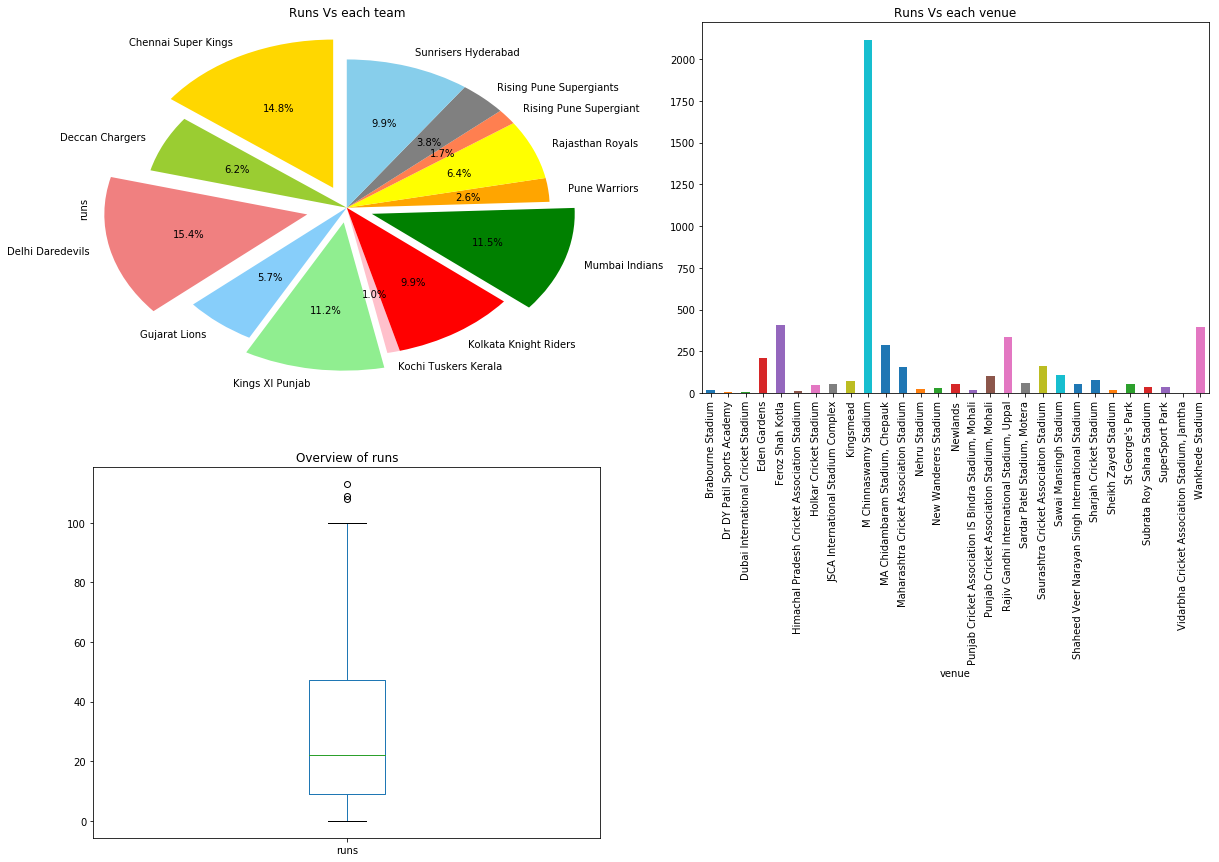

In [86]:
fig = plt.figure(figsize=(20,15) )# create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3)
#datatoss.describe
datatoss.plot(kind = 'box',ax = ax2)
ax2.set_title('Overview of runs')
ga = datatoss.groupby('team', axis=0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','red','green','orange','yellow','coral','gray','skyblue']
explode_list = [0.15,0,0.2,0, 0.1, 0, 0, 0.13, 0,0,0,0,0]
ga['runs'].plot(kind = 'pie',autopct='%1.1f%%',startangle=90,colors=colors_list,explode=explode_list,ax=ax0)
ax0.set_title('Runs Vs each team')

gg = datatoss.groupby('venue', axis=0).sum()
gg['runs'].plot(kind = 'bar',ax=ax1)
ax1.set_title('Runs Vs each venue')
#plt.title('runs by venue ') 

## Divide runs column into range to convert problem into classification

In [67]:
bin = [-1,40,80,200]
category = pd.cut(datatoss.runs,bin)
category = category.to_frame()
category.columns = ['range1']
df_new = pd.concat([datatoss,category],axis = 1)
dffin = df_new['range1'].apply(str)
range1 = {'(-1, 40]':0,'(40, 80]':1,'(80, 200]':2}
dffin = [range1[item] for item in dffin] 
dffin = pd.DataFrame(dffin,columns=['range'])
df_final = pd.concat([df_new,dffin],axis = 1)
df_final = df_final.drop(columns=['runs','range1'],axis = 1)
df_final

,team,venue,range
0,Sunrisers Hyderabad,M Chinnaswamy Stadium,1
1,Sunrisers Hyderabad,M Chinnaswamy Stadium,1
2,Sunrisers Hyderabad,M Chinnaswamy Stadium,0
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
5,Mumbai Indians,M Chinnaswamy Stadium,1
6,Mumbai Indians,M Chinnaswamy Stadium,0
7,Mumbai Indians,M Chinnaswamy Stadium,0
8,Mumbai Indians,M Chinnaswamy Stadium,0
9,Mumbai Indians,M Chinnaswamy Stadium,0


## Apply preprocessing technique to df_final

In [68]:
processed_df = df_final.copy()
le = preprocessing.LabelEncoder()
processed_df.team = le.fit_transform(processed_df.team)
processed_df.venue = le.fit_transform(processed_df.venue)
X = processed_df.drop(['range'], axis=1).values
y = processed_df['range'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(processed_df)
X

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.94519555, -0.41027786],
       [ 1.94519555, -0.41027786],
       [ 1.94519555, -0.41027786],
       [ 1.94519555,  0.75144709],
       [ 1.94519555,  0.75144709],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113, -0.41027786],
       [ 0.53514113,  2.34881889],
       [ 0.53514113,  2.34881889],
       [ 0.53514113,  2.34881889],
       [ 0.53514113, -0.26506224],
       [-0.5929024 , -0.41027786],
       [-0.5929024 , -0.41027786],
       [-0.5929024 ,  1.04187832],
       [-0.5929024 ,  1.04187832],
       [ 0.25313025, -0.41027786],
       [ 0.25313025, -0.41027786],
       [ 0.25313025, -0.41027786],
       [ 0.25313025, -1.28157157],
       [ 0.25313025, -1.28157157],
       [ 0.25313025, -0.7007091 ],
       [-0.87491328, -0.41027786],
       [-0.87491328, -0.41027786],
       [-0.87491328,

# Machine learning models
## Stacking(Advanced Ensemble technique)
### Stacking is an ensemble learning technique that uses predictions from multiple models (for example  XGBClassifier and RandomForestClassifier) to build a new model.

In [99]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

from xgboost import XGBClassifier
xgb = XGBClassifier(learning_curve = 0.03 , gamma = 0.8,eta = 0.3,max_depth=30,random_state=10,n_estimators = 100)

from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier(max_depth =10)

from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 100,max_depth =30,min_samples_leaf =15,n_jobs=-1,random_state=10)

rfr.fit(X,y)
mptra1['b'] = pd.DataFrame(rfr.predict(X))

xgb.fit(X,y)
mptra2['c'] = pd.DataFrame(xgb.predict(X))

df= pd.concat([mptra1['b'], mptra2['c']], axis=1)

from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
cv =  cross_val_score(dr,df,y,cv=5)
print(cv.mean())
print('----')
print(cv.std())

0.743376623377
----
0.0388535313274


## Grid search to find best parameters

In [ ]:
#from sklearn.grid_search import GridSearchCV
#parameters=[{'learning_curve':[0.3,0.2],'gamma':[0.9,0.8,1],'eta':[0.2,0.3,0.4],
#            'max_depth':[7,6,5]}]
#grid_search = GridSearchCV(estimator=xgb,param_grid=parameters,scoring='accuracy',cv=20)
#grid_search = grid_search.fit(X,y)
 

In [23]:
#score = grid_search.best_score_
#print(score)
#param = grid_search.best_params_
#print(param)

0.656626506024
{'learning_curve': 0.3, 'max_depth': 7, 'eta': 0.2, 'gamma': 0.8}


## Get SL Malinga's all Ball by Ball data

In [72]:
player_team="Mumbai Indians"
name='SL Malinga'

#extracting bowler_data
bowler_data=delivery_data[delivery_data.bowler==name]

#creating a dataframe containing names of all team except player's own team
teams=pd.DataFrame(index=match_data.team1.unique())
teams=teams.drop('Mumbai Indians')
teams
bowler_data
bowler_data.player_dismissed = bowler_data.player_dismissed.notnull().astype('int')
bowler_data.player_dismissed.sum()


data=match_data[(match_data.team1==player_team)|(match_data.team2==player_team)]
data

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
36,37,2017,Mumbai,2017-05-01,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Wankhede Stadium,AK Chaudhary,CB Gaffaney,NaN


## SL Malinga's wickets in each innings

In [77]:
#bowling first
data=match_data[(match_data.team1==player_team)]
bowling_first=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team2==team)].id
        
        wk=0
        for match in matches:
                wk=0
#                print(bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')])
#                if(bowler_data[bowler_data.match_id==match]):
#                print(match)
                t=bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')].player_dismissed.sum()
                wk=wk+t
                bowling_first=bowling_first+[[team,venue,wk]]
         
#bowling second        
data=match_data[match_data.team2==player_team]
bowling_second=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team1==team)].id
        wk=0
        
        for match in matches:
            wk=0
#            print(match)
            t=bowler_data[(bowler_data.match_id==match)&(bowler_data.dismissal_kind!='run out')].player_dismissed.sum()
            wk=wk+t
           
            bowling_second=bowling_second+[[team,venue,wk]]
                
        
bowling_first=bowling_first+bowling_second

df=pd.DataFrame(data=bowling_first,columns=['team','venue','wicket'])    
#df=df[df.wicket!=0]
df.wicket.sum()

df

,team,venue,wicket
0,Sunrisers Hyderabad,Wankhede Stadium,4
1,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",1
2,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
5,Gujarat Lions,Wankhede Stadium,0
6,Gujarat Lions,Green Park,0
7,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,0
8,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",0
9,Royal Challengers Bangalore,Wankhede Stadium,0


### Visualization of Data

Text(0.5,1,'Wickets in each venue')

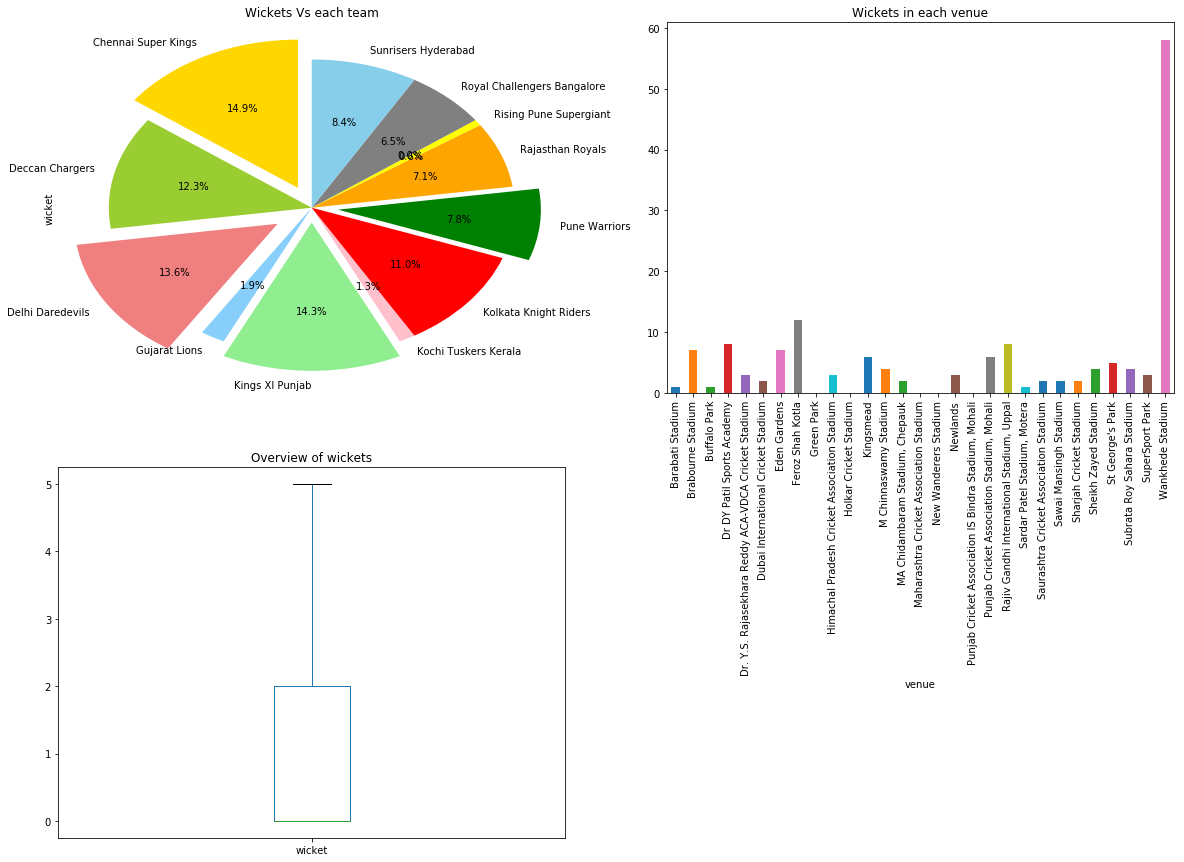

In [78]:
fig = plt.figure(figsize=(20,15) )# create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3)
#datatoss.describe
df.plot(kind = 'box',ax = ax2)
ax2.set_title('Overview of wickets')
ga = df.groupby('team', axis=0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','red','green','orange','yellow','coral','gray','skyblue']
explode_list = [0.15,0,0.2,0, 0.1, 0, 0, 0.13, 0,0,0,0,0]
ga['wicket'].plot(kind = 'pie',autopct='%1.1f%%',startangle=90,colors=colors_list,explode=explode_list,ax=ax0)
ax0.set_title('Wickets Vs each team')

gg = df.groupby('venue', axis=0).sum()
gg['wicket'].plot(kind = 'bar',ax=ax1)
ax1.set_title('Wickets in each venue')

## Divide wicket column into range to convert problem into classification

In [75]:
#df['wicket']
bin = [-1,1,3,10]
category = pd.cut(df.wicket,bin)
category = category.to_frame()
category.columns = ['range']

df_new = pd.concat([df,category],axis = 1)
dffin = df_new['range'].apply(str)

range1 = {'(-1, 1]':0,'(1, 3]':1,'(3, 10]':2}
dffin = [range1[item] for item in dffin] 

dffin = pd.DataFrame(dffin,columns=['range1'])
df_final = pd.concat([df_new,dffin],axis = 1)
df_final = df_final.drop(columns=['wicket','range'],axis = 1)

df_final

,team,venue,range1
0,Sunrisers Hyderabad,Wankhede Stadium,2
1,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
2,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
3,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",0
5,Gujarat Lions,Wankhede Stadium,0
6,Gujarat Lions,Green Park,0
7,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,0
8,Rising Pune Supergiant,"Rajiv Gandhi International Stadium, Uppal",0
9,Royal Challengers Bangalore,Wankhede Stadium,0


## Apply preprocessing technique

In [76]:
processed_df = df_final.copy()
le = preprocessing.LabelEncoder()
processed_df.team = le.fit_transform(processed_df.team)
processed_df.venue = le.fit_transform(processed_df.venue)

X = processed_df.drop(['range1'], axis=1).values
y = processed_df['range1'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#y = sc.fit_transform(processed_df)
X

C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Nihal Patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.64344559,  1.06926814],
       [ 1.64344559,  0.15757636],
       [ 1.64344559,  0.15757636],
       [ 1.64344559,  0.15757636],
       [ 1.64344559,  0.15757636],
       [-0.62291889,  1.06926814],
       [-0.62291889, -0.9567136 ],
       [ 0.88799076, -0.34891908],
       [ 0.88799076,  0.15757636],
       [ 1.39162732,  1.06926814],
       [ 1.39162732,  1.06926814],
       [ 1.39162732,  1.06926814],
       [ 1.39162732,  1.06926814],
       [ 1.39162732,  1.06926814],
       [ 1.39162732, -1.46320903],
       [ 1.39162732,  0.76537088],
       [ 1.39162732, -0.24761999],
       [ 1.39162732, -1.66580721],
       [ 1.39162732, -0.55151725],
       [ 1.39162732, -0.55151725],
       [ 1.39162732, -1.26061086],
       [ 0.13253593,  1.06926814],
       [ 0.13253593,  1.06926814],
       [ 0.13253593,  1.06926814],
       [ 0.13253593, -1.15931177],
       [ 0.13253593, -1.15931177],
       [ 0.13253593, -1.15931177],
       [ 0.13253593, -1.15931177],
       [ 0.13253593,

## Machine learning models

In [183]:
from sklearn.tree import DecisionTreeClassifier
dr = DecisionTreeClassifier(max_depth=10)

from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators =100,max_depth=15)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,learning_curve = 0.05 , gamma = 0.9,eta = 0.4,max_depth=15)

rfr.fit(X,y)
mptra1 = pd.DataFrame(rfr.predict(X))

dr.fit(X,y)
mptra2 = pd.DataFrame(dr.predict(X))

df= pd.concat([mptra1, mptra2], axis=1)
#df_test = pd.concat([mptes1, mptes2], axis=1)

from sklearn.cross_validation import cross_val_score
cv =  cross_val_score(dr,df,y,cv=3)
print(cv.mean())
print('----')
print(cv.std())


0.82411848587
----
0.0394486380874
